# Scikit-image Testing

I want to use the "number of regions" as part of the loss metric, as it is important that there are only 3? regions in the final mask.

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import cluster

In [3]:
test_image = nib.load('data/PSEA12 Baseline/PSEA12_Baseline_CTImg_Time01.nii')
image = test_image.get_fdata()

In [4]:
image

memmap([[[31156., 30692., 31689., ...,     0.,     0.,     0.],
         [30803., 30874., 31115., ...,     0.,     0.,     0.],
         [30803., 30944., 31166., ...,     0.,     0.,     0.],
         ...,
         [29766., 29545., 29947., ..., 31538., 24812., 30451.],
         [29686., 29494., 29545., ..., 31538., 24943., 30451.],
         [29736., 29283., 29706., ..., 31186., 24943., 30451.]],

        [[31287., 30874., 31297., ...,     0.,     0.,     0.],
         [31246., 31166., 31115., ...,     0.,     0.,     0.],
         [31105., 31166., 31166., ...,     0.,     0.,     0.],
         ...,
         [29988., 29746., 29947., ..., 31629., 29202., 30451.],
         [29857., 29494., 29947., ..., 31629., 24328., 30451.],
         [29736., 29283., 29927., ..., 30914., 24328., 30451.]],

        [[31266., 31075., 31015., ...,     0.,     0.,     0.],
         [31277., 31297., 30743., ...,     0.,     0.,     0.],
         [31538., 31297., 31045., ...,     0.,     0.,     0.],
        

In [6]:
image.dtype

dtype('float64')

In [34]:
image.shape

(300, 300, 37)

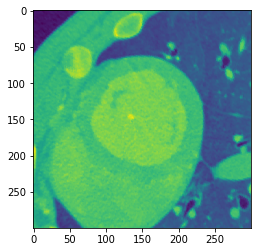

In [37]:
plt.imshow(image[:, :, 20])

In [36]:
kmeans_cluster = cluster.KMeans(n_clusters=3)
kmeans_cluster.fit(image.reshape(-1, 1))
cluster_centers = kmeans_cluster.cluster_centers_
cluster_labels = kmeans_cluster.labels_

In [53]:
cluster_centers

array([[30908.06306478],
       [23851.84254837],
       [33199.55691572]])

In [29]:
cluster_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [46]:
image[0, 0, 30]

926.0

In [52]:
cluster_centers[cluster_labels].reshape(image.shape)[25, 200, 30]

23851.84254836776

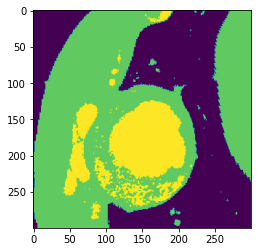

In [45]:
plt.imshow(cluster_centers[cluster_labels].reshape(image.shape)[:, :, 30])

In [4]:
test_mask_path = 'data/PSEA12 Baseline/PSEA12_Baseline_Mask_Time01.nii'
test_mask = nib.load(test_mask_path)

In [28]:
from skimage import measure

In [6]:
image = test_mask.get_fdata()[:, :, 20]

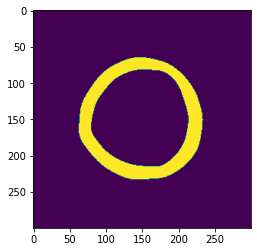

In [7]:
plt.imshow(image)

In [8]:
table = regionprops_table(image.astype(int))

In [9]:
table['label']

array([1])

In [10]:
test_mask_3 = np.load('test3.npy')
test_mask_3.shape

(256, 256)

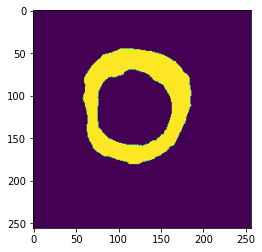

In [16]:
plt.imshow(test_mask_3)

In [20]:
table2 = regionprops_table(test_mask_3)
table2['label']

array([1])

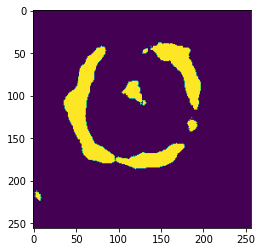

In [21]:
test_mask_4 = np.load('test4.npy')
plt.imshow(test_mask_4)

In [22]:
table3 = regionprops_table(test_mask_4)
table3

{'label': array([1]),
 'bbox-0': array([38]),
 'bbox-1': array([2]),
 'bbox-2': array([224]),
 'bbox-3': array([197])}

In [29]:
label = measure.label(test_mask_3)

In [31]:
props = measure.regionprops(label)
len(props)

1

In [34]:
for label in props:
    print(label.centroid)

(106.65491942879602, 121.94340364208044)


In [35]:
label2 = measure.label(test_mask_4)

In [37]:
props2 = measure.regionprops(label2)
len(props2)

8

In [38]:
for label in props2:
    print(label.centroid)

(67.756242568371, 174.06361474435195)
(133.23761629368872, 85.13930098063867)
(42.0, 138.0)
(47.666666666666664, 131.4)
(95.55128205128206, 118.15897435897436)
(126.0, 186.0)
(134.7310924369748, 186.52941176470588)
(217.8235294117647, 5.509803921568627)
